In [1]:
import numpy as np
from qutip import about, basis, brmesolve, destroy, plot_expectation_values

%matplotlib inline

for system with `N` states, constant Hamiltonian and no `a_ops`, expectation value is constant

In [2]:
# num modes
N = 2
# Hamiltonian
a = destroy(N)
H = a.dag() * a

# initial state
psi0 = basis(N, N - 1)

# times for simulation
times = np.linspace(0, 10, 100)

# solve using brmesolve
result_const = brmesolve(H, psi0, times, e_ops=[a.dag() * a])

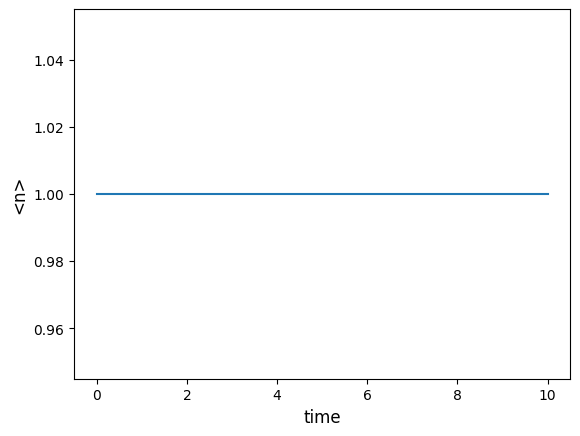

In [3]:
plot_expectation_values(result_const, ylabels=["<n>"]);


Adding time dependence

c:\Users\Tommy\OneDrive - Durham University\level 4 Project\L4 code directory\.venv\Lib\site-packages\qutip\core\coefficient.py:423: UserWarning: `cython`, `setuptools` and `filelock` are required for compilation of string coefficents. Falling back on `eval`.
  warnings.warn(


(<Figure size 640x480 with 1 Axes>,
 array([<Axes: xlabel='time', ylabel='<n>'>], dtype=object))

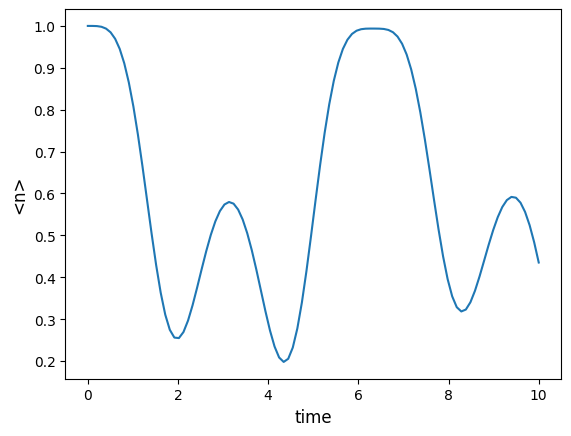

In [4]:
time_dependence = "sin(t)"

H_t = [H, [a + a.dag(), time_dependence]]
result_brme = brmesolve(H_t, psi0, times, e_ops=[a.dag() * a])
plot_expectation_values(result_brme, ylabels=["<n>"])

setup time dependent dissipation with `a_ops`

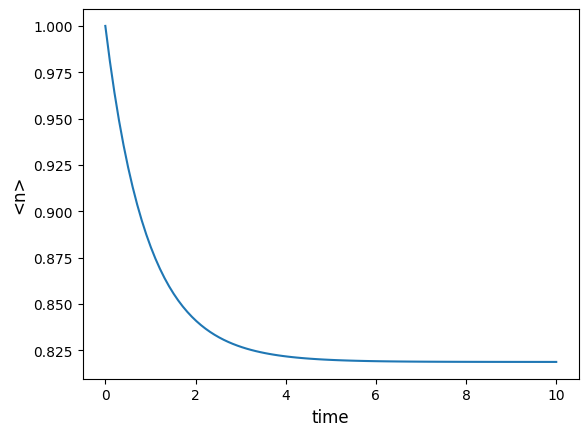

In [5]:
# setup dissipation
kappa = 0.2
a_ops = [
    ([a+a.dag(), f'sqrt({kappa}*exp(-t))'], '(w>=0)')
]
# solve
result_brme_aops = brmesolve(H, psi0, times, a_ops, e_ops=[a.dag() * a])

plot_expectation_values([result_brme_aops], ylabels=["<n>"]);

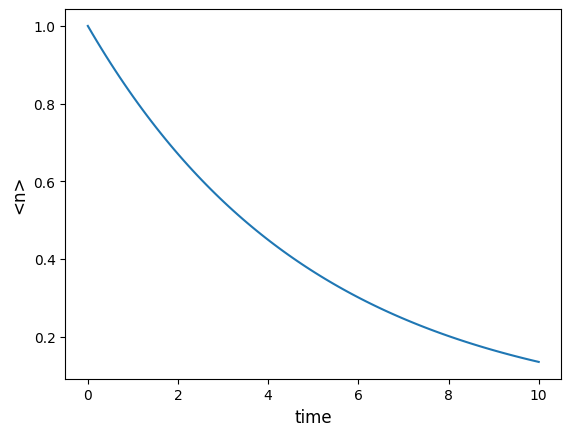

In [6]:
a_ops = [([[a, 'exp(1j*t)'], [a.dag(), 'exp(-1j*t)']],
          f'{kappa} * (w >= 0)')]

# solve using brmesolve and plot expecation
result_brme_aops_sum = brmesolve(H, psi0, times, a_ops, e_ops=[a.dag() * a])
plot_expectation_values([result_brme_aops_sum], ylabels=["<n>"]);